# Exploratory Data Analysis Introduction


*   Identify the distribution of data.
*   Identify outliers.
*   Remove outliers.
*   Identify correlation between features.

In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution
### To determine how the data is distributed

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


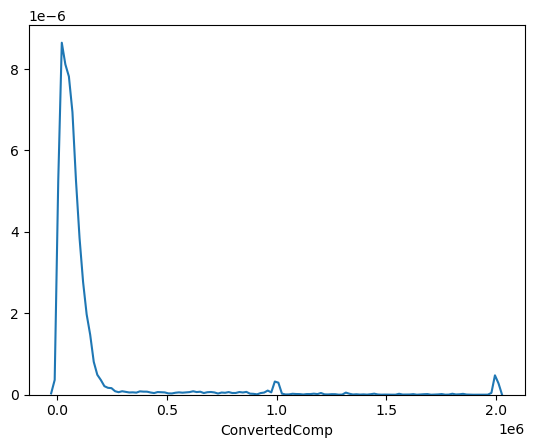

In [9]:
import seaborn as sns
import plotly
ax = sns.distplot(df['ConvertedComp'], hist=False)

Plot the histogram for the column `ConvertedComp`.


In [10]:
ax = plt.histplot(df['ConvertedComp'])

NameError: name 'plt' is not defined

Finding the median of the column `ConvertedComp`


In [11]:
df['ConvertedComp'].median()

57745.0

To find how many responders identified only as a **Man**


In [12]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

To find the  median ConvertedComp of responders identified only as a **Woman**?


In [13]:
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57708.0

To give the five number summary for the column `Age`


**Hint:**  min,q1,median,q3,max of a column are its five number summary.


In [14]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


In [15]:
df['Age'].median()

29.0

In [17]:
sns.histplot(df['Age'])

AttributeError: module 'seaborn' has no attribute 'histplot'

## Outliers
### Finding outliers

To find out if outliers exist in the column `ConvertedComp` using a box plot;


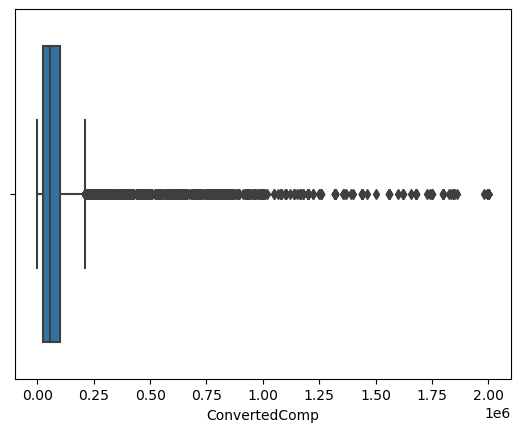

In [16]:
ax = sns.boxplot(x=df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [1]:
IQR = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
IQR

NameError: name 'df' is not defined

Find out the upper and lower bounds.


In [19]:
Lbound = df['ConvertedComp'].quantile(0.25) - 1.5*IQR
Lbound = max(Lbound, df['ConvertedComp'].min())
Lbound

0.0

In [22]:
Ubound = df['ConvertedComp'].quantile(0.75) + 1.5*IQR
Ubound

209698.0

Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# your code goes here
len(df[df['ConvertedComp'] > Ubound])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
df2 = df[df['ConvertedComp'] <= Ubound]
df2['ConvertedComp'].median()

52704.0

## Correlation
### Finding correlation

Find the correlation between `Age` and all other numerical columns.


In [25]:
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

***Authors: Ramesh Sannareddy***
***Alteration: Sochi Obodozie***

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
